# freud.order.Nematic: Nematic Order Parameter and the Nematic Tensor

## The Nematic Order Parameter

The nematic order parameter is designed to identify and analyze orientational order in anisotropic particle systems. These systems are often seen in soft matter physics, where identifying the degree of order can have substantial implications for material properties. But, what does it mean for a system to have orientational order?

The most orientationally disordered state of a system of particles is one where particle orientations are completely random. By contrast, a state with perfect orientational order exists when all particles are aligned in a common direction. The Nematic order parameter serves as a measure of this order, quantifying how well the particles in the system align with a common direction, termed the "nematic director".

The nematic order parameter is a scalar value between 0 and 1. A value between 0 and 0.3 describes the disordered phase, where orientations are completely random. A value between 0.3 and 0.8 describes the nematic (liquid crystal) phase, where orientational order begins to emerge. Finally, a value between 0.8 and 1.0 describes the crystalline phase, where orientations are highly ordered. The boundary values described above are guidelines rather than strict boundaries and for more information, please see [Wikipedia](https://en.wikipedia.org/wiki/Liquid_crystal).

## Calculating the Nematic Order Parameter

The nematic order parameter $S$ is defined via the eigenvalues of the nematic tensor 𝐐. The nematic tensor is defined as

$$
\mathbf{Q} = \mathbf{M} - \frac{1}{3} \mathbf{I}
$$

where $\mathbf{M}$ is the integral of the outer product of vectors $\mathbf{m}$ describing particle orientations weighted by the probability distribution $f(\mathbf{m})$ of particle orientations in 3D, taken over the unit hemisphere $\mathcal{B}$

$$
\mathbf{M} = \int_{\mathcal{B}} (\mathbf{m} \otimes \mathbf{m}) f(\mathbf{m}) d\sigma(\mathbf{m}).
$$

In other words, the elements of the $3 \times 3$ matrix $\mathbf{M}$ are computed by taking the particle orientation vectors $\mathbf{m}^{(i)}$, multiplying the components together, and summing over all particles in the system.

$$
\mathbf{M}_{\alpha\beta} = \sum_{i=1}^{N} \mathbf{m}^{(i)}_{\alpha} \mathbf{m}^{(i)}_{\beta}.
$$

The eigenvalues of $Q$ are $\frac{2}{3}S, -\frac{1}{3}S, -\frac{1}{3}S$ and the eigenvector associated with the largest eignevalue is called the nematic director $\mathbf{n}$. The nematic director is the principal direction of alignment in the system and defines the direction of orientational order. If known ahead of time, $S$ can be defined via $\mathbf{n}$ as

$$
S = \frac{1}{2} \int_{\mathcal{B}} (3\cos^2 \beta - 1),
$$

where $\mathcal{B}$ is the angle between the molecular axis $\mathbf{m}$ and the nematic director. The nematic tensor can further be defined as

$$
\mathbf{Q} = S (\mathbf{n} \otimes \mathbf{n} - \frac{1}{3} \mathbf{I}).
$$

## Example 1: A Disordered System

We start by considering a system of particles with random orientations and positions, where the nematic order parameter should be zero. The code snippet below demonstrates how to use freud to compute the nematic order parameter:

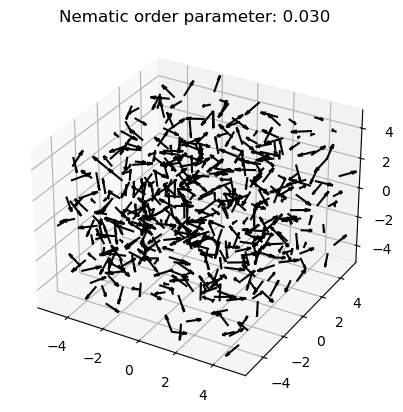

In [1]:
import freud
import matplotlib.pyplot as plt
import numpy as np
import rowan

%matplotlib inline

# box length
L = 10
# number of particles
N = 500
# make a system
box, points = freud.data.make_random_system(L, N, seed=0)

# make random orientations using rowan
orientations = rowan.rotate(rowan.random.rand(N), [1, 0, 0])
nematic = freud.order.Nematic()
nematic.compute(orientations)
# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_title(f"Nematic order parameter: {nematic.order:.3f}")
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="black",
)

The calculated nematic order parameter is very close to zero indicating that there is no order in the orientation of the particles. This makes sense because the orientations were generated randomly. 

## Example 2: Liquid Crystal in the Nematic Phase

In the nematic phase, particle orientations show some degree of alignment in the direction of the nematic director. The code block below demonstrates uses freud to compute the nematic order parameter for a system in the nematic phase:

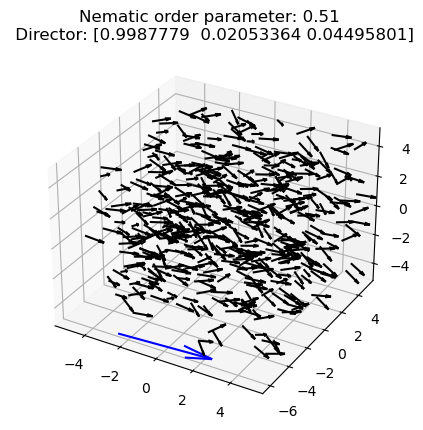

In [2]:
# We start with all orientations pointing in the same direction
orientations = np.asarray(
    [
        [1, 0, 0],
    ]
    * N
)


def randomize_orientations(orientations, perturbation_magnitude):
    randomized_orientations = []
    for orientation in orientations:
        phi = np.random.uniform(0, 2 * np.pi)
        costheta = np.random.uniform(-1, 1)
        theta = np.arccos(costheta)

        perturbation = (
            np.array(
                [
                    np.sin(theta) * np.cos(phi),
                    np.sin(theta) * np.sin(phi),
                    np.cos(theta),
                ]
            )
            * perturbation_magnitude
        )

        new_orientation = orientation + perturbation
        # Normalize the new orientation vector to maintain unit length
        new_orientation /= np.linalg.norm(new_orientation)
        randomized_orientations.append(new_orientation)
    return np.array(randomized_orientations)


# We rotate starting orientations [1,0,0] slightly, in a random direction
orientations = randomize_orientations(orientations, 0.75)
# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="k",
)

nematic = freud.order.Nematic()
nematic.compute(orientations)
ax.set_title(
    f"Nematic order parameter: {nematic.order:.2f} \n Director: {nematic.director}"
)
# plot the director as a blue arrow
ax.quiver3D(
    -L / 2 * nematic.order,
    -L / 2 * 1.2,
    -L / 2,
    nematic.director[0],
    nematic.director[1],
    nematic.director[2],
    length=L * nematic.order,
    normalize=True,
    color="blue",
)

The nematic order parameter is now around 0.5 meaning that there is a preferred direction of particle orientations. The blue arrow in the above plot is the nematic director, which defines this orientation.

## Example 3: Different Degrees of Orientational Order

To establish how the nematic order parameter changes with the degree of orientational alignment, we now show a series of systems with increasing degrees of orientational disorder.

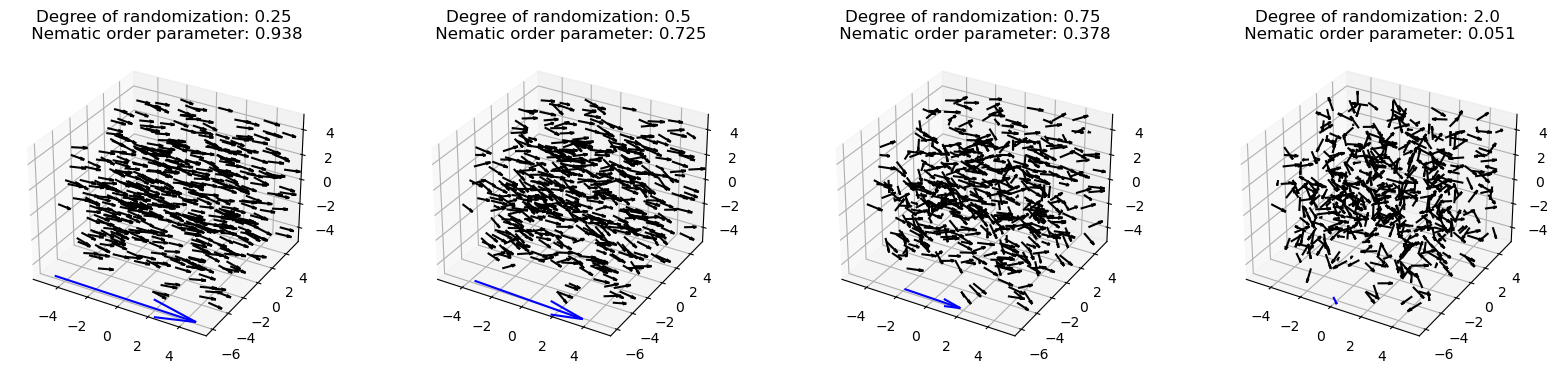

In [3]:
orientations = np.asarray(
    [
        [1, 0, 0],
    ]
    * N
)
# amount of randomization for system snapshots
randomization = [0.25, 0.5, 0.75, 2.0]
# make multiple 3D subplots
fig, axes = plt.subplots(
    nrows=1, ncols=len(randomization), figsize=(20, 4), subplot_kw={"projection": "3d"}
)
# instantiate the Nematic class
nematic = freud.order.Nematic()
for ax, degree_of_randomization in zip(axes, randomization):
    # We randomly rotate the starting orientations using a given degree of randomization
    orientations = randomize_orientations(orientations, degree_of_randomization)
    # compute the order parameter
    nematic.compute(orientations)
    ax.set_title(
        f"Degree of randomization: {degree_of_randomization}\n Nematic order parameter: {nematic.order:.3f}"
    )
    # make a 3D plot of the system
    ax.quiver3D(
        points[:, 0],
        points[:, 1],
        points[:, 2],
        orientations[:, 0],
        orientations[:, 1],
        orientations[:, 2],
        normalize=True,
        color="k",
    )

    ax.quiver3D(
        -L / 2 * nematic.order,
        -L / 2 * 1.2,
        -L / 2,
        nematic.director[0],
        nematic.director[1],
        nematic.director[2],
        length=L * nematic.order,
        normalize=True,
        color="blue",
    )

Finally, we confirm the perfectly ordered system has a nematic order parameter of 1.

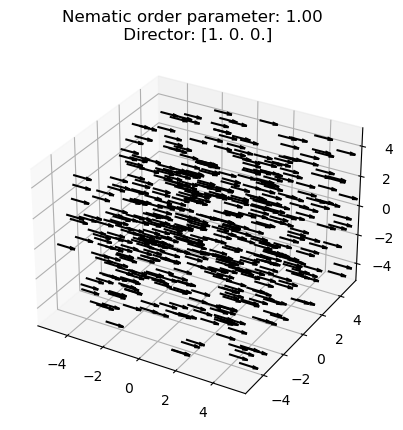

In [4]:
# all orientations point in the same direction [1,0,0]
orientations = np.asarray(
    [
        [1, 0, 0],
    ]
    * N
)
nematic = freud.order.Nematic()
nematic.compute(orientations)
# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_title(
    f"Nematic order parameter: {nematic.order:.2f} \n Director: {nematic.director}"
)
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="k",
)